# Financial Stock Analysis

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

## Query Data

In [2]:

def pull_data(ticker, start_date, end_date):
    """
    Recieves the ticker, start & end date and returns NYSE data as a pandas dataframe
    
    Parameters:
    ticker: Company stock ticker for the NYSE as a string
    start_date: The desired start date as a string
    end_date: The desired end date as a string

    Returns:
    All of the parameters above as a string
    data: pandas.Dataframe containing NYSE data
    """
    
    stock_data = yf.download(tickers=ticker, start=start_date, end=end_date)
    data = pd.DataFrame(stock_data)

    return ticker, start_date, end_date, data


In [3]:
ticker, start_date, end_date, data = pull_data(ticker='MCD', start_date='2020-01-02', end_date=datetime.today().strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


## EDA  of Stock Data

### Data Manipulation and Transformation

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,198.000000,200.800003,197.809998,200.789993,180.963852,3554200
2020-01-03,199.389999,200.550003,198.850006,200.080002,180.323975,2767600
2020-01-06,199.600006,202.770004,199.350006,202.330002,182.351791,4660400
2020-01-07,201.869995,202.679993,200.509995,202.630005,182.622147,4047400
2020-01-08,202.619995,206.690002,202.199997,205.910004,185.578308,5284200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1154 entries, 2020-01-02 to 2024-08-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1154 non-null   float64
 1   High       1154 non-null   float64
 2   Low        1154 non-null   float64
 3   Close      1154 non-null   float64
 4   Adj Close  1154 non-null   float64
 5   Volume     1154 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.1 KB


In [6]:
price_cols = data.select_dtypes(include=['float64']).columns

In [7]:
data['Daily Delta'] = data['Close'].pct_change() * 100
data['Daily Delta'] = data['Daily Delta'].round(2)

In [8]:
data = data.fillna(0)

In [9]:
data[price_cols] = data[price_cols].map(lambda x: round(x, 2))

In [10]:
# Daily price volatility
daily_volatility = data['Daily Delta'].std()

In [11]:
daily_volatility

1.5097048779577114

In [12]:
# Annual price volatilty
# There are 252 trading days in a year
annualized_volatility = daily_volatility * (252 ** 0.5)
annualized_volatility

23.965821961063337

In [13]:
""" # These all look pretty similar on line plots
# Try combining on a clandlestick graph
for col in price_cols:
    
    plt.figure(figsize=(16,8))
    plt.title(f"{col} by Date for {ticker}")

    data[col].plot(); """

' # These all look pretty similar on line plots\n# Try combining on a clandlestick graph\nfor col in price_cols:\n    \n    plt.figure(figsize=(16,8))\n    plt.title(f"{col} by Date for {ticker}")\n\n    data[col].plot(); '

In [14]:
moving_averages = 30, 60, 90, 200

for i in moving_averages:
    data[f'{i} day MA'] = data['Close'].rolling(i).mean().round(2)

### Plot data

In [15]:
def plot_data(data):

    plt.figure(figsize=(16,8))
    plt.title(f"Close by Date for {ticker}")

    ax = data['Close'].plot()
    ax1 = data['30 day MA'].plot()
    ax2 = data['60 day MA'].plot()
    ax3 = data['90 day MA'].plot()
    ax4 = data['200 day MA'].plot()
    plt.legend()
    plt.show();

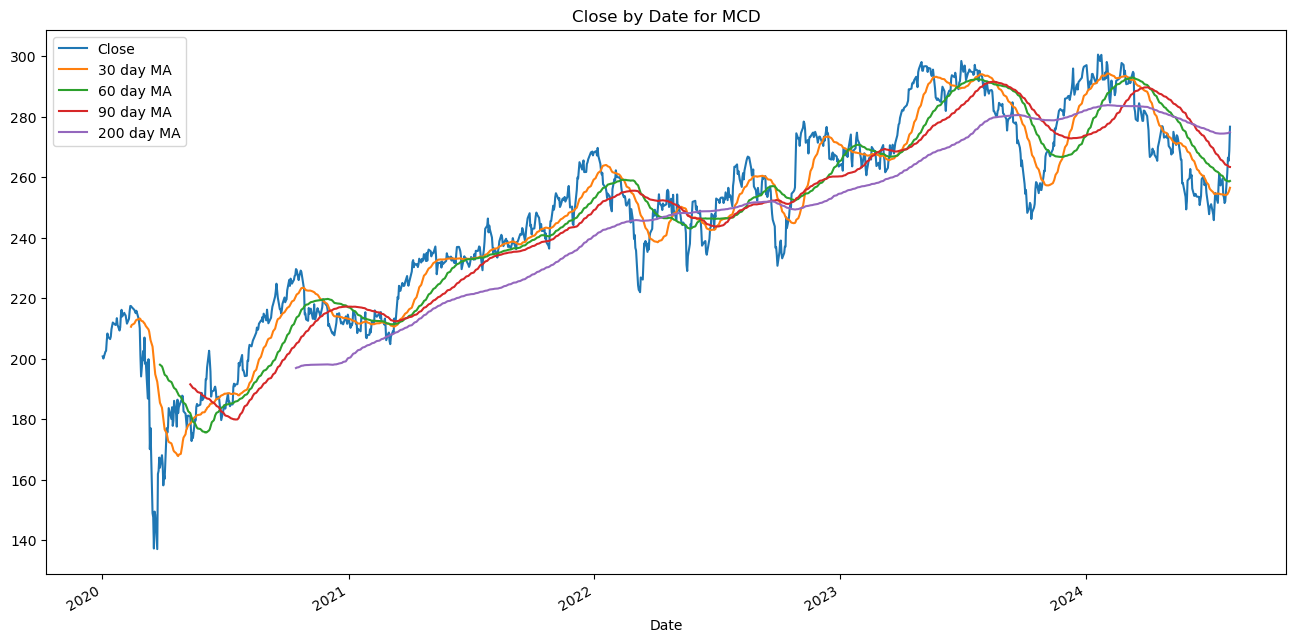

In [16]:
plot_data(data)

In [17]:
""" # return all of the days when the closing price was below the 200 day moving average
below_200 = data['Close'] < data['200 day MA']

# Find the initial crosses
initial_cross_below = below_200 & ~below_200.shift(1).fillna(False)
initial_cross_above = ~below_200 & below_200.shift(1).fillna(True)

plt.figure(figsize=(16,8))
plt.title(f"Close by Date for {ticker}")

ax = data['Close'].plot(label='Close')
ax1 = data['30 day MA'].plot(linestyle='--')
ax2 = data['60 day MA'].plot(linestyle='--')
ax3 = data['90 day MA'].plot(linestyle='--')
ax4 = data['200 day MA'].plot(linestyle='--')

# Plot vertical lines for initial crosses below the 200 day moving average
for day in data[initial_cross_below].index:
    plt.axvline(x=day, color='red', linestyle=':', linewidth=0.75, alpha=0.8)

# Plot vertical lines for initial crosses above the 200 day moving average
for day in data[initial_cross_above].index:
    plt.axvline(x=day, color='green', linestyle=':', linewidth=0.75, alpha=0.8)


plt.legend(); """

' # return all of the days when the closing price was below the 200 day moving average\nbelow_200 = data[\'Close\'] < data[\'200 day MA\']\n\n# Find the initial crosses\ninitial_cross_below = below_200 & ~below_200.shift(1).fillna(False)\ninitial_cross_above = ~below_200 & below_200.shift(1).fillna(True)\n\nplt.figure(figsize=(16,8))\nplt.title(f"Close by Date for {ticker}")\n\nax = data[\'Close\'].plot(label=\'Close\')\nax1 = data[\'30 day MA\'].plot(linestyle=\'--\')\nax2 = data[\'60 day MA\'].plot(linestyle=\'--\')\nax3 = data[\'90 day MA\'].plot(linestyle=\'--\')\nax4 = data[\'200 day MA\'].plot(linestyle=\'--\')\n\n# Plot vertical lines for initial crosses below the 200 day moving average\nfor day in data[initial_cross_below].index:\n    plt.axvline(x=day, color=\'red\', linestyle=\':\', linewidth=0.75, alpha=0.8)\n\n# Plot vertical lines for initial crosses above the 200 day moving average\nfor day in data[initial_cross_above].index:\n    plt.axvline(x=day, color=\'green\', lines

### Plotly
The Plotly api returns interative visuals that provides interactive feedback

#### Libraries

In [18]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
def plot_line(ticker, data):

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_heights=[0.7, 0.3], vertical_spacing=0.05,
                        subplot_titles=(f"Close by Date for {ticker}", "Volume"))

    # Add close price line plot
    fig.add_trace(go.Scatter(
        x=data.index, y=data['Close'], mode='lines', name='Close',
        line=dict(width=1)
    ), row=1, col=1)

    # Adding moving averages with dotted lines as 'trace' figures
    fig.add_trace(go.Scatter(
        x=data.index, y=data['30 day MA'], mode='lines', name='30 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['60 day MA'], mode='lines', name='60 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['90 day MA'], mode='lines', name='90 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['200 day MA'], mode='lines', name='200 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    # Add volume bar chart
    fig.add_trace(go.Bar(
        x=data.index, y=data['Volume'], name='Volume',
        marker_color='blue', opacity=0.5
    ), row=2, col=1)

    # Update layout to adjust figure size, add title, and add rangeslider
    fig.update_layout(
        width=1400,height=1000,
        showlegend=True,
        xaxis_rangeslider_visible=False,  # Disable the default rangeslider
        xaxis2_rangeslider_visible=True,  # Add a rangeslider to the second x-axis
        xaxis2_rangeslider_thickness=0.05  # Adjust the thickness of the rangeslider
    )

    fig.show()


In [20]:
plot_line(ticker, data)

In [21]:
def plot_detailed_candlestick(ticker, data):

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_heights=[0.7, 0.3], vertical_spacing=0.05,
                        subplot_titles=(f"Close by Date for {ticker}", "Volume"))

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        name='Candlestick'
    ), row=1, col=1)

    # Adding moving averages with dotted lines as 'trace' figures
    fig.add_trace(go.Scatter(
        x=data.index, y=data['30 day MA'], mode='lines', name='30 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['60 day MA'], mode='lines', name='60 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['90 day MA'], mode='lines', name='90 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=data.index, y=data['200 day MA'], mode='lines', name='200 day MA',
        line=dict(width=1, dash='dot')
    ), row=1, col=1)

    # Add volume bar chart
    fig.add_trace(go.Bar(
        x=data.index, y=data['Volume'], name='Volume',
        marker_color='blue', opacity=0.5
    ), row=2, col=1)

    # Update layout to adjust figure size, add title, and add rangeslider
    fig.update_layout(
        width=1400,height=1000,
        showlegend=True,
        xaxis_rangeslider_visible=False,  # Disable the default rangeslider
        xaxis2_rangeslider_visible=True,  # Add a rangeslider to the second x-axis
        xaxis2_rangeslider_thickness=0.05  # Adjust the thickness of the rangeslider
    )

    fig.show()


In [22]:
plot_detailed_candlestick(ticker, data)

## Forcasting stock price

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [24]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Delta',
       '30 day MA', '60 day MA', '90 day MA', '200 day MA'],
      dtype='object')

### Feature Engineering

In [25]:
df = data

In [26]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek

df

,Open,High,Low,Close,Adj Close,Volume,Daily Delta,30 day MA,60 day MA,90 day MA,200 day MA,year,month,day_of_month,day_of_week
Date,,,,,,,,,,,,,,,
2020-01-02,198.00,200.80,197.81,200.79,180.96,3554200,0.00,NaN,NaN,NaN,NaN,2020,1,2,3
2020-01-03,199.39,200.55,198.85,200.08,180.32,2767600,-0.35,NaN,NaN,NaN,NaN,2020,1,3,4
2020-01-06,199.60,202.77,199.35,202.33,182.35,4660400,1.12,NaN,NaN,NaN,NaN,2020,1,6,0
2020-01-07,201.87,202.68,200.51,202.63,182.62,4047400,0.15,NaN,NaN,NaN,NaN,2020,1,7,1
2020-01-08,202.62,206.69,202.20,205.91,185.58,5284200,1.62,NaN,NaN,NaN,NaN,2020,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29,253.55,263.93,250.23,261.42,261.42,9381000,3.74,254.33,258.81,263.95,274.51,2024,7,29,0
2024-07-30,261.00,267.37,260.31,266.44,266.44,4936600,1.92,254.76,258.69,263.75,274.58,2024,7,30,1
2024-07-31,265.42,267.67,263.20,265.40,265.40,4652100,-0.39,255.15,258.61,263.55,274.68,2024,7,31,2


### Prep data for model

In [27]:
ml_data = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', '30 day MA', '60 day MA', '90 day MA', '200 day MA'])

X = ml_data.drop(columns='Close')
y = ml_data['Close']

### Train model

In [28]:
# Split data into training and test sets. Setting the randome state at 42 for reproducability and setting the standard test size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


model = xgb.XGBRegressor()

model.fit(X_train, y_train)
preds = model.predict(X_test)


In [29]:
def score_model(y_test, preds):
    
    mse = mean_squared_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    scores_dict = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    model_scores = pd.DataFrame(list(scores_dict.items()), columns=['Metric', 'Score'])

    return model_scores


In [30]:
base_model_scores = score_model(y_test, preds)

base_model_scores

,Metric,Score
0,MSE,28.662242
1,RMSE,5.353713
2,R2,0.974017


In [31]:
df['Price_Prediction'] = model.predict(X)

In [32]:
def plot_predictions(ticker, df):

    # Create subplots with shared x-axis
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        row_heights=[0.7, 0.3], vertical_spacing=0.05,
                        subplot_titles=(f"Close by Date for {ticker}", "Volume"))

    # Add close price line plot
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines+markers', name='Close Price',
        line=dict(width=2, color='blue'), marker=dict(size=4, color='blue')
    ), row=1, col=1)

    # Add moving averages with dotted lines
    fig.add_trace(go.Scatter(
        x=df.index, y=df['30 day MA'], mode='lines', name='30 day MA',
        line=dict(width=1, dash='dot', color='green')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['60 day MA'], mode='lines', name='60 day MA',
        line=dict(width=1, dash='dot', color='orange')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['90 day MA'], mode='lines', name='90 day MA',
        line=dict(width=1, dash='dot', color='purple')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        x=df.index, y=df['200 day MA'], mode='lines', name='200 day MA',
        line=dict(width=1, dash='dot', color='red')
    ), row=1, col=1)

    # Add the prediction line
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Price_Prediction'], mode='lines', name='Price Prediction',
        line=dict(width=2, dash='dash', color='red')
    ), row=1, col=1)

    # Add volume bar chart
    fig.add_trace(go.Bar(
        x=df.index, y=df['Volume'], name='Volume',
        marker=dict(color='blue')
    ), row=2, col=1)
    
    mean_volume = df['Volume'].mean()
    mean_volume_line = [mean_volume] * len(df.index)
    

    fig.add_trace(go.Scatter(
        x=df.index, y=mean_volume_line, mode='lines', name='Avg. Trading Volume',
        line=dict(width=1, color='red')
    ), row=2, col=1)

    df['30 day Volume MA'] = df['Volume'].rolling(window=30).mean()
    fig.add_trace(go.Scatter(
    x=df.index, y=df['30 day Volume MA'], mode='lines', name='30 day Volume MA',
    line=dict(width=2, dash='dot', color='orange')
    ), row=2, col=1)



    # Update layout to adjust figure size, add title, and add rangeslider
    fig.update_layout(
        width=1800,
        height=1000,
        showlegend=True,
        xaxis_rangeslider_visible=False,  # Disable the default rangeslider
        xaxis2_rangeslider_visible=True,  # Add a rangeslider to the second x-axis
        xaxis2_rangeslider_thickness=0.05,  # Adjust the thickness of the rangeslider
        title_x=0.5,
        template='plotly_dark'
    )

    fig.show()


In [33]:
plot_predictions(ticker, df)

### Time Serires Cross Validation

In [34]:
from sklearn.model_selection import TimeSeriesSplit

In [35]:
tss = TimeSeriesSplit(n_splits=4, test_size=252, gap=1)

In [36]:
for train_idx, val_idx in tss.split(df):
    break

In [37]:
train_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144])

In [38]:
val_idx

array([146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
       302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 32

#### Lag Features

In [39]:
target_map = df['Close'].to_dict()

In [40]:
# Creating a one year lag variable
def create_lag(data):
    data['lag1'] = (data.index - pd.Timedelta('252 days')).map(target_map)

    return data

In [41]:
df = create_lag(df)

### Creating future dates

In [42]:
end_date

'2024-08-04'

In [62]:
future = pd.date_range(end_date, '2025-08-03')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
ml_data = create_lag(ml_data)
ml_data['isFuture'] = False


df_w_future = pd.concat([ml_data, future_df])

## Train predicition model

In [49]:
ml_data.columns

Index(['Close', 'Volume', 'Daily Delta', 'year', 'month', 'day_of_month',
       'day_of_week', 'isFuture', 'lag1'],
      dtype='object')

In [59]:
features = ['Volume', 'Daily Delta', 'year', 'month', 'day_of_month',
       'day_of_week', 'isFuture', 'lag1']
target = 'Close'

X_all = ml_data[features]
y_all = ml_data[target]

# Train model

reg_model = xgb.XGBRegressor()

reg_model.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[0]	validation_0-rmse:23.57550
[99]	validation_0-rmse:0.36907


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
df_w_future['preds'] = reg_model.predict(df_w_future[features])

In [64]:
df_w_future.head()

,Close,Volume,Daily Delta,year,month,day_of_month,day_of_week,isFuture,lag1,preds
2020-01-02,200.79,3554200.0,0.00,2020.0,1.0,2.0,3.0,False,NaN,200.782669
2020-01-03,200.08,2767600.0,-0.35,2020.0,1.0,3.0,4.0,False,NaN,200.541855
2020-01-06,202.33,4660400.0,1.12,2020.0,1.0,6.0,0.0,False,NaN,202.278778
2020-01-07,202.63,4047400.0,0.15,2020.0,1.0,7.0,1.0,False,NaN,203.269714
2020-01-08,205.91,5284200.0,1.62,2020.0,1.0,8.0,2.0,False,NaN,205.968033
